<a target="_blank" href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/2-Advance/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock¬†Trading Using Ensemble Strategy

Tutorials to use OpenAI DRL to trade multiple stocks using ensemble strategy in one Jupyter Notebook | Presented at ICAIF 2020

* This notebook is the reimplementation of our paper: Deep Reinforcement Learning for Automated Stock Trading: An Ensemble Strategy, using FinRL.
* Check out medium blog for detailed explanations: https://medium.com/@ai4finance/deep-reinforcement-learning-for-automated-stock-trading-f1dad0126a02
* Please report any issues to our Github: https://github.com/AI4Finance-LLC/FinRL-Library/issues
* **Pytorch Version**



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ‚àà A includes three actions: a ‚àà {‚àí1, 0, 1}, where ‚àí1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {‚àík, ..., ‚àí1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or ‚àí10, respectively

* Reward function: r(s, a, s‚Ä≤) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s‚Ä≤) = v‚Ä≤ ‚àí v, where v‚Ä≤ and v represent the portfolio
values at state s‚Ä≤ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [1]:
# ## install finrl library
!pip install wrds
!pip install swig
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.0/3.0 MB 64.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 35.9 MB/s eta 0:00:00
‚è¨ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:12
üîÅ Restarting kernel...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.11/site-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)
/usr/local/lib/python3.11/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


<a id='1.4'></a>
## 2.4. Create Folders

In [2]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [3]:
print(DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [4]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'

TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2023-03-01'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (97013, 8)


In [5]:
df.head()

Price        date      close       high        low       open     volume  \
0      2010-01-04   6.440330   7.660714   7.585000   7.622500  493729600   
1      2010-01-04  40.591297  57.869999  56.560001  56.630001    5277400   
2      2010-01-04  32.828991  41.099998  40.389999  40.810001    6894300   
3      2010-01-04  43.777546  56.389999  54.799999  55.720001    6186700   
4      2010-01-04  39.738235  59.189999  57.509998  57.650002    7325600   

Price   tic  day  
0      AAPL    0  
1      AMGN    0  
2       AXP    0  
3        BA    0  
4       CAT    0

In [6]:
df.tail()

Price        date       close        high         low        open    volume  \
97008  2023-02-28  461.652893  483.359985  473.920013  482.670013   3902100   
97009  2023-02-28  216.611603  221.770004  219.500000  220.000000   5385400   
97010  2023-02-28   33.829254   38.970001   38.549999   38.700001  16685300   
97011  2023-02-28   31.044868   35.779999   35.320000   35.480000   8847000   
97012  2023-02-28   46.112190   47.549999   46.983334   47.000000  18054000   

Price  tic  day  
97008  UNH    1  
97009    V    1  
97010   VZ    1  
97011  WBA    1  
97012  WMT    1

In [7]:
df.shape

(97013, 8)

In [8]:
df.sort_values(['date','tic']).head()

Price        date      close       high        low       open     volume  \
0      2010-01-04   6.440330   7.660714   7.585000   7.622500  493729600   
1      2010-01-04  40.591297  57.869999  56.560001  56.630001    5277400   
2      2010-01-04  32.828991  41.099998  40.389999  40.810001    6894300   
3      2010-01-04  43.777546  56.389999  54.799999  55.720001    6186700   
4      2010-01-04  39.738235  59.189999  57.509998  57.650002    7325600   

Price   tic  day  
0      AAPL    0  
1      AMGN    0  
2       AXP    0  
3        BA    0  
4       CAT    0

In [9]:
len(df.tic.unique())

30

In [10]:
df.tic.value_counts()

tic
AAPL    3311
AMGN    3311
AXP     3311
BA      3311
CAT     3311
CRM     3311
CSCO    3311
CVX     3311
DIS     3311
GS      3311
HD      3311
HON     3311
IBM     3311
INTC    3311
JNJ     3311
JPM     3311
KO      3311
MCD     3311
MMM     3311
MRK     3311
MSFT    3311
NKE     3311
PG      3311
TRV     3311
UNH     3311
V       3311
VZ      3311
WBA     3311
WMT     3311
DOW      994
Name: count, dtype: int64

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007‚Äì2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [11]:
#  INDICATORS = ['macd',
#                'rsi_30',
#                'cci_30',
#                'dx_30']

In [12]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [13]:
processed.sample(5)

date       close        high         low        open    volume  \
68508  2019-05-23  166.926727  192.539993  186.270004  188.449997   7754000   
86793  2021-11-19  195.951385  203.500000  199.850006  202.039993  18032600   
33559  2014-08-08   18.039999   25.059999   24.740000   24.870001  21648600   
79146  2020-11-04  249.347305  252.880005  243.240005  246.020004   6505400   
95195  2023-01-18  253.995071  274.369995  265.720001  273.510010   3276500   

        tic  day      macd     boll_ub     boll_lb     rsi_30      cci_30  \
68508    HD    3 -1.868396  178.269020  161.719014  48.323103 -100.435591   
86793     V    4 -4.733285  223.611576  192.208540  38.964821 -136.956517   
33559  CSCO    4 -0.018132   18.967749   17.815687  52.582273  -82.881889   
79146   CRM    2 -2.741339  272.203686  227.409761  54.084451  -13.941283   
95195   MCD    2  0.026479  259.698375  249.842273  50.094720    0.675621   

           dx_30  close_30_sma  close_60_sma  turbulence  
68508  42.583994    172.765698    168.441451   32.593498  
86793  37.094652    212.776560    216.627833   36.064110  
33559  26.146234     18.290926     17.951930   21.045653  
79146   7.015474    249.033045    242.960299   96.310790  
95195   1.998763    256.485324    256.893799   29.594377

<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,‚Ä¶,-1, 0, 1,¬†‚Ä¶, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

In [14]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 291


In [15]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* In this notebook, we are training and validating 3 agents (A2C, PPO, DDPG) using Rolling-window Ensemble Method ([reference code](https://github.com/AI4Finance-LLC/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/80415db8fa7b2179df6bd7e81ce4fe8dbf913806/model/models.py#L92))

In [16]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)



In [19]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }
TD3_model_kwargs = {  # Define TD3_model_kwargs
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }


timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000,
                  'td3': 10_000 #add td3 to timesteps_dict
                 }

In [27]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 SAC_model_kwargs = None, # provide a value for SAC_model_kwargs
                                                 TD3_model_kwargs=TD3_model_kwargs,
                                                 timesteps_dict=timesteps_dict)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


============Start Ensemble Strategy============
turbulence_threshold:  201.71917397978441
======Model training from:  2010-01-01 to  2021-10-04
======a2c Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cuda device
Logging to tensorboard_log/a2c/a2c_126_1


/usr/local/lib/python3.11/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-------------------------------------
| time/                 |           |
|    fps                | 93        |
|    iterations         | 100       |
|    time_elapsed       | 5         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -41.2     |
|    explained_variance | 0.0812    |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -10.7     |
|    reward             | 0.1997767 |
|    std                | 1         |
|    value_loss         | 0.789     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 90        |
|    iterations         | 200       |
|    time_elapsed       | 11        |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -41.2     |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updat

/usr/local/lib/python3.11/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


--------------------------------
| time/              |         |
|    fps             | 106     |
|    iterations      | 1       |
|    time_elapsed    | 19      |
|    total_timesteps | 2048    |
| train/             |         |
|    reward          | 1.21184 |
--------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 103         |
|    iterations           | 2           |
|    time_elapsed         | 39          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014607359 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.2       |
|    explained_variance   | 0.00676     |
|    learning_rate        | 0.00025     |
|    loss                 | 3.93        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0253     |
|    reward               | 0.9

/usr/local/lib/python3.11/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


--------------------------------------
| time/                 |            |
|    fps                | 83         |
|    iterations         | 100        |
|    time_elapsed       | 5          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -41.2      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | -81.2      |
|    reward             | 0.36164647 |
|    std                | 1          |
|    value_loss         | 5.24       |
--------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 91        |
|    iterations         | 200       |
|    time_elapsed       | 10        |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -41.1     |
|    explained_variance | -2.15e-06 |
|    learning_rate      | 0.0007  

/usr/local/lib/python3.11/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


----------------------------------
| time/              |           |
|    fps             | 100       |
|    iterations      | 1         |
|    time_elapsed    | 20        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 0.6457881 |
----------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 101        |
|    iterations           | 2          |
|    time_elapsed         | 40         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01339671 |
|    clip_fraction        | 0.21       |
|    clip_range           | 0.2        |
|    entropy_loss         | -41.2      |
|    explained_variance   | -0.00649   |
|    learning_rate        | 0.00025    |
|    loss                 | 5.45       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0277    |
|    reward               | -

/usr/local/lib/python3.11/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


----------------------------------------
| time/                 |              |
|    fps                | 92           |
|    iterations         | 100          |
|    time_elapsed       | 5            |
|    total_timesteps    | 500          |
| train/                |              |
|    entropy_loss       | -41          |
|    explained_variance | -0.00976     |
|    learning_rate      | 0.0007       |
|    n_updates          | 99           |
|    policy_loss        | -30.4        |
|    reward             | -0.070234105 |
|    std                | 0.994        |
|    value_loss         | 1.02         |
----------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 96         |
|    iterations         | 200        |
|    time_elapsed       | 10         |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -40.9      |
|    explained_variance | -0.023

/usr/local/lib/python3.11/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


-----------------------------------
| time/              |            |
|    fps             | 105        |
|    iterations      | 1          |
|    time_elapsed    | 19         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | 0.45052162 |
-----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 100         |
|    iterations           | 2           |
|    time_elapsed         | 40          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014857134 |
|    clip_fraction        | 0.194       |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.2       |
|    explained_variance   | -0.00882    |
|    learning_rate        | 0.00025     |
|    loss                 | 4.76        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0255     |
|   

/usr/local/lib/python3.11/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


----------------------------------------
| time/                 |              |
|    fps                | 83           |
|    iterations         | 100          |
|    time_elapsed       | 5            |
|    total_timesteps    | 500          |
| train/                |              |
|    entropy_loss       | -41          |
|    explained_variance | -0.167       |
|    learning_rate      | 0.0007       |
|    n_updates          | 99           |
|    policy_loss        | -48.6        |
|    reward             | -0.016921123 |
|    std                | 0.996        |
|    value_loss         | 2.15         |
----------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 90         |
|    iterations         | 200        |
|    time_elapsed       | 10         |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -41        |
|    explained_variance | -0.143

/usr/local/lib/python3.11/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


----------------------------------
| time/              |           |
|    fps             | 98        |
|    iterations      | 1         |
|    time_elapsed    | 20        |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 0.8703991 |
----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 99          |
|    iterations           | 2           |
|    time_elapsed         | 41          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014823811 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -41.2       |
|    explained_variance   | -0.0305     |
|    learning_rate        | 0.00025     |
|    loss                 | 7.17        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0201     |
|    reward  

In [28]:
df_summary

Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
0  126  2021-10-04  2022-01-03        A2C   0.299537   0.175814    0.006839   
1  189  2022-01-03  2022-04-04       DDPG  -0.302864  -0.142163   -0.041242   
2  252  2022-04-04  2022-07-06       DDPG  -0.213931  -0.238792   -0.156087   
3  315  2022-07-06  2022-10-04        TD3   -0.17154   -0.26324   -0.183427   

  SAC Sharpe TD3 Sharpe  
0       None   0.165117  
1       None  -0.105229  
2       None  -0.180914  
3       None   -0.11114

<a id='6'></a>
# Part 7: Backtest Our¬†Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

In [29]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [31]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    # Use pd.concat instead of append
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.32323329523249283


In [ ]:
df_account_value.head()

account_value        date  daily_return    datadate
0  1000000.000000  2022-01-03           NaN  2022-01-03
1   999006.177890  2022-01-04     -0.000994  2022-01-04
2   992190.375143  2022-01-05     -0.006823  2022-01-05
3   986549.918776  2022-01-06     -0.005685  2022-01-06
4   984951.522695  2022-01-07     -0.001620  2022-01-07

<Axes: >

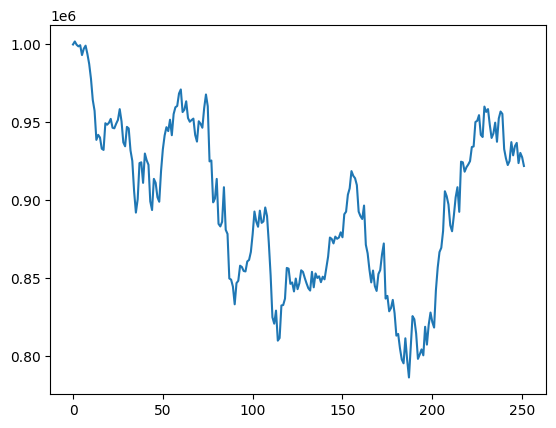

In [32]:
%matplotlib inline
df_account_value.account_value.plot()

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [33]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.077995
Cumulative returns    -0.077995
Annual volatility      0.194051
Sharpe ratio          -0.323233
Calmar ratio          -0.362319
Stability              0.131282
Max drawdown          -0.215267
Omega ratio            0.947012
Sortino ratio         -0.443625
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.012472
Daily value at risk   -0.024697
dtype: float64


In [34]:
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (251, 8)
Annual return         -0.094324
Cumulative returns    -0.093968
Annual volatility      0.198502
Sharpe ratio          -0.402058
Calmar ratio          -0.429901
Stability              0.236972
Max drawdown          -0.219408
Omega ratio            0.936015
Sortino ratio         -0.559755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.014390
Daily value at risk   -0.025326
dtype: float64


In [35]:
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji+.csv")

df_account_value.to_csv('df_account_value.csv')


df_dji:             date           dji
0    2022-01-03  1.000000e+06
1    2022-01-04  1.005866e+06
2    2022-01-05  9.951360e+05
3    2022-01-06  9.904718e+05
4    2022-01-07  9.903404e+05
..          ...           ...
247  2022-12-27  9.086102e+05
248  2022-12-28  8.986103e+05
249  2022-12-29  9.080428e+05
250  2022-12-30  9.060324e+05
251  2023-01-03           NaN

[252 rows x 2 columns]
df_dji:                       dji
date                    
2022-01-03  1.000000e+06
2022-01-04  1.005866e+06
2022-01-05  9.951360e+05
2022-01-06  9.904718e+05
2022-01-07  9.903404e+05
...                  ...
2022-12-27  9.086102e+05
2022-12-28  8.986103e+05
2022-12-29  9.080428e+05
2022-12-30  9.060324e+05
2023-01-03           NaN

[252 rows x 1 columns]


<a id='6.2'></a>
## 7.2 BackTestPlot

df_result_ensemble.columns:  Index(['ensemble'], dtype='object')
df_trade_date:         datadate
0    2021-10-04
1    2021-10-05
2    2021-10-06
3    2021-10-07
4    2021-10-08
..          ...
348  2023-02-22
349  2023-02-23
350  2023-02-24
351  2023-02-27
352  2023-02-28

[353 rows x 1 columns]
df_result_ensemble:                  ensemble
date                    
2022-01-03  1.000000e+06
2022-01-04  1.001923e+06
2022-01-05  9.998466e+05
2022-01-06  9.987833e+05
2022-01-07  9.995329e+05
...                  ...
2022-12-27  9.368210e+05
2022-12-28  9.238616e+05
2022-12-29  9.303969e+05
2022-12-30  9.276271e+05
2023-01-03  9.220049e+05

[252 rows x 1 columns]
==============Compare to DJIA===========
result:                  ensemble           dji
date                                  
2022-01-03  1.000000e+06  1.000000e+06
2022-01-04  1.001923e+06  1.005866e+06
2022-01-05  9.998466e+05  9.951360e+05
2022-01-06  9.987833e+05  9.904718e+05
2022-01-07  9.995329e+05  9.903404e+05
...       

<Figure size 1500x500 with 0 Axes>

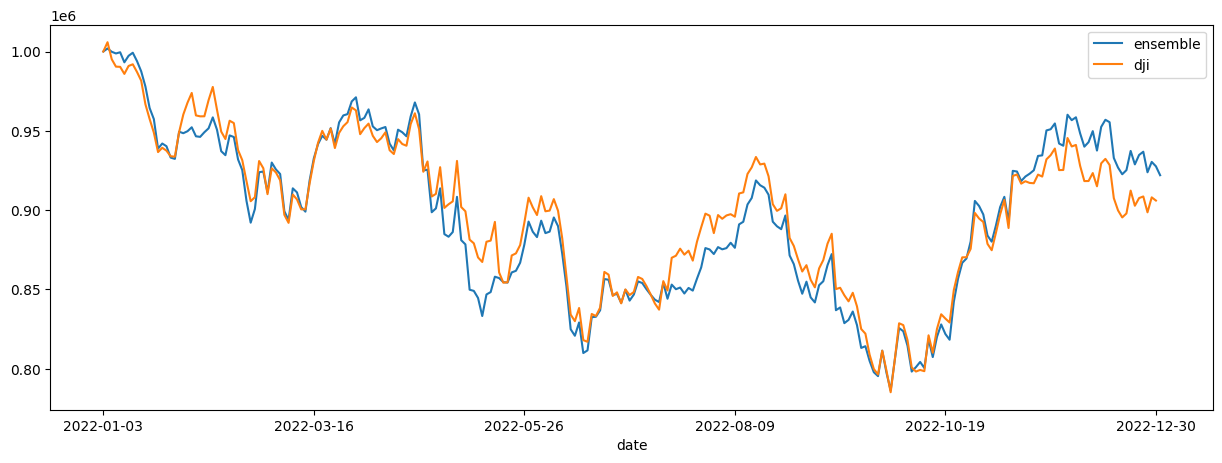

In [36]:


# print("==============Compare to DJIA===========")
# %matplotlib inline
# # S&P 500: ^GSPC
# # Dow Jones Index: ^DJI
# # NASDAQ 100: ^NDX
# backtest_plot(df_account_value,
#               baseline_ticker = '^DJI',
#               baseline_start = df_account_value.loc[0,'date'],
#               baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])
df.to_csv("df.csv")
df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

print("df_result_ensemble.columns: ", df_result_ensemble.columns)

# df_result_ensemble.drop(df_result_ensemble.columns[0], axis = 1)
print("df_trade_date: ", df_trade_date)
# df_result_ensemble['date'] = df_trade_date['datadate']
# df_result_ensemble['account_value'] = df_account_value['account_value']
df_result_ensemble.to_csv("df_result_ensemble.csv")
print("df_result_ensemble: ", df_result_ensemble)
print("==============Compare to DJIA===========")
result = pd.DataFrame()
# result = pd.merge(result, df_result_ensemble, left_index=True, right_index=True)
# result = pd.merge(result, df_dji, left_index=True, right_index=True)
result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
print("result: ", result)
result.to_csv("result.csv")
result.columns = ['ensemble', 'dji']

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();